# Comparaison d’´echantillons et tests multiples -- Code R


# Coucou je m'appelel Madeleine 

## 3 - Test non paramétrique 

![title](Consignes-Exo3.png)

Pour facliter la compréhension du code créé plusieurs fonctions pour décomposer ce que l'on souhaite faire.

In [73]:
get_Ranked_R1<-function(x,y){
## Fonction dans laquelle on met deux vecteurs x et y et on a la somme des rangs du premier dans le vecteur total (R1 de l'énoncé) 
    m=length(x)+length(y)
    df_1<-data.frame(data=x,type=1)
    df_2<-data.frame(data=y,type=0)
    df<-rbind(df_1,df_2)
    or<-df[order(df$data),]
    return(sum((or$type==1)*(1:m)))
}    

In [74]:
get_Quantile_empirique<-function(x,alpha){
## Fonction pour obternir le quantil empirique de niveau alpha de l'échantillon x
    rank=floor(length(x)*alpha)+1
    return(x[order(x)][rank])
}

In [75]:
estim_quantil_R1<-function(n1,n2,alpha,m){
## Estimation du quantil de niveau alpha de R1 
## n1 le nombre d'échantillons dans le premier groupe, n2 pour le deuxième groupe
## m le nombre de simulation de R1 que l'on souhaite faire pour approximer le quantil
    x<-c()
    for (i in 1:m) {
        y1<-runif(n1,0,1)
        y2<-runif(n2,0,1)
        x<-c(x,get_Ranked_R1(y1,y2))
    }
    return(get_Quantile_empirique(x,alpha))
}

In [87]:
estim_quantil_R1(100,100,0.05,100)

[1] 9435

In [77]:
evolE<- function(x){              
##evolution estimateurde de Monte Carlo
  return(cumsum(x)/(1:length(x)))
}

evolIC <- function(x, delta, level) {  
##evolution interval de confiance de niveau estimateurde de Monte Carlo
  n <- length(x)
  s2 <- (cumsum(x^2) - (1:n) * (delta)^2)/(0:(n - 1)) 
  IC <- qnorm(0.5 * (level + 1)) * sqrt(s2/(1:n))     ##calcul de q* racindeVar 
  return(data.frame(var = s2, born_inf_IC = delta - IC,born_sup_IC = delta + IC))
}
##il faut comprendre ce qui se passe

In [88]:
MC <- function(y,lev) {   ##Methode de monte carlo classique
  a<-evolE(y)        ## on recupere l'evolution de l'estimateur
  b<-evolIC(y,a,lev) ## on recupere l'evolution de l'intervalle de confiance
  n<-length(y)
  par(mfrow=c(1,1))
  plot(1:n, a, type = "l", lwd = 2, col = "violetred3",main = "Evolution de l'estimation", ylim = c(-0.2,0.6), xlab = "n",ylab="y")
  lines(2:n, b$born_inf_IC[-1], col = "sienna2", lwd = 2)
  lines(2:n, b$born_sup_IC[-1], col = "sienna2", lwd = 2)
  legend("topright", c("Intervalle de confiance", "estimateur"), lwd = c(2, 1),
         col = c("sienna2", "violetred3"), inset = 0.05, bg = "gray95",
         box.lty = 0)
  return(data.frame(value=a[n],b[n,]))
}

In [89]:
tester_quantil_empirique<-function(n1,n2,mq,mmc,alpha){
    
    q_emp<-estim_quantil_R1(n1,n2,alpha,mq)
    x<-c()
    for (i in 1:mmc){
        y1<-runif(n1,0,1)
        y2<-runif(n2,0,1)
        x<-c(x,1*(get_Ranked_R1(y1,y2)<=q_emp))
    }
       
    MC(x,0.5)
    
}

ERROR: Error in xy.coords(x, y): objet 'b' introuvable


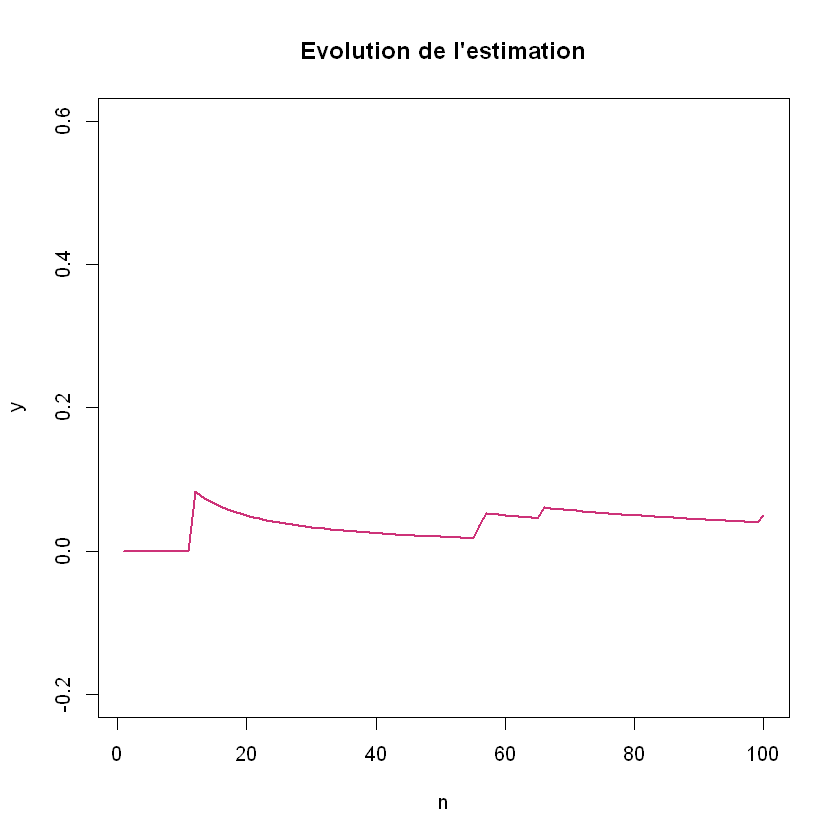

In [90]:
tester_quantil_empirique(100,100,1000,100,0.05)

### 3 - a)

On veut : 

Penser avec Normales générales puis avec les données

-Faire une fonction qui plot la fonction de répartition empirique.
(-Comparer la fonction de répartition empirique enfonction de différent N ? )
-Evolution de q en fonction de N

In [4]:
evolE<- function(x){              #fonction qui returne un vecteur avec l'évolution de notre estimateur de MC
  return(cumsum(x)/(1:length(x)))
}

evolIC <- function(x, delta, level) {  ## x<-echantillon de l'estimateur et delta=evolution de l'estimateur
  n <- length(x)
  s2 <- (cumsum(x^2) - (1:n) * (delta)^2)/(0:(n - 1)) 
  IC <- qnorm(0.5 * (level + 1)) * sqrt(s2/(1:n))     ##calcul de q* racindeVar 
  return(data.frame(var = s2, born_inf_IC = delta - IC,born_sup_IC = delta + IC))
}

MC <- function(y,lev) {   ##Methode de monte carlo classique
  a<-evolE(y)        ## on recupere l'evolution de l'estimateur
  b<-evolIC(y,a,lev) ## on recupere l'evolution de l'intervalle de confiance
  n<-length(y)
  par(mfrow=c(1,1))
  plot(1:n, a, type = "l", lwd = 2, col = "violetred3",main = "Evolution de l'estimation", ylim = c(-0.2,0.6), xlab = "n",ylab="y")
  lines(2:n, b$born_inf_IC[-1], col = "sienna2", lwd = 2)
  lines(2:n, b$born_sup_IC[-1], col = "sienna2", lwd = 2)
  legend("topright", c("Intervalle de confiance", "estimateur"), lwd = c(2, 1),
         col = c("sienna2", "violetred3"), inset = 0.05, bg = "gray95",
         box.lty = 0)
  return(data.frame(value=a[n],b[n,]))
}


## Aide -- Ancien code à moi qui peut nous être utile 


In [5]:
##Partie 1

ft1 <-function(x,y) {  #f tilde 1
  return(exp(-1/2*((x^2)/4+y^2))*(abs(y)<=1))
} 

ft2 <- function(x,y) {  #f tilde 2
  return( ((cos(x)^2)+0.5*(sin(3*y)^2)*(cos(x)^4))*exp(-1/2*((x^2)/4+y^2)) )
}

M1<-4*pi      #Les constantes utilisees pour l'algorithme de rejet
M2<-1.5*M1

g<- function(x,y){ #Le g qu'on utilise dans l'algorithme de rejet pour f1 et f2
  return( 1/(4*pi)*exp((-1/2)*(x^2/4+y^2)) ) #Equivalent : dnorm(x,0,2)*dnorm(y,0,1)
}

Mu1<-4*sqrt(2*pi)
gu<- function(x,y){
  return( 1/(4*sqrt(2*pi))*exp((-1/2)*(x^2/4))*(abs(y)<1) )
}
c1 <- 1/(4*pi*(pnorm(1)-pnorm(-1))) #Constante de normalisation : f1=c1*ft1

f1<-function(x,y){
  return(c1*ft1(x,y))
}

dmarginale2f1<- function(x){ #La marginale de f1 selon la deuxieme variable
  return(exp(-1/2*(x^2))/(sqrt(2*pi)*(pnorm(1)-pnorm(-1)))*(abs(x)<=1))
}

##Partie 2

h1<- function(x,y) {    # fonction dont on cherche l'esperence par 
  return(((exp(x)+exp(y))>=5)*1)
}

h2 <- function(x,y) {   # fonction dont on cherche l'esperence deuxieme cas 
  return( cos(x*y)*sin(x)*exp(sin(x+y)) ) }


##Partie3

dmarginale2fR<- function(x,M){ 
  #La marginale des variables rejetees selon la deuxieme variable (Z2) pour normale 
  return((M*dnorm(x,0,1)-dmarginale2f1(x))/(M-1))
}


dmarginale2fRu<- function(x,M){ 
#La marginale des variables rejetees selon la deuxieme variable
  return((M*dunif(x,-1,1)-dmarginale2f1(x))/(M-1))
}

c3<-1/(4*pi*(pnorm(1)-pnorm(-1)+0.5)) 

f3 <-function(x,y) {  #f tilde 3 fois sa constante de normalisation
  return(c3*exp(-1/2*((x^2)/4+y^2))*((abs(y)<=1)+0.5))
} 



##Partie4

alphaMH <- function(f,g,x1,x2,y1,y2){
  return(min(1,(f(y1,y2)*g(x1,x2))/(f(x1,x2)*g(y1,y2))))
}

##General

estimVar <- function(x) { #Variance empirique
  return(mean(x^2)-(mean(x)^2))
}

estimVar1 <- function(x) { #Nous donne un vecteur pour voir l'evolution de la variance empirique
  return((x-cumsum(x)/1:n)^2)
}

IC <- function(n,x,s) { #Intervale de confiance de niveau s
  return( c(mean(x)-estimVar(x)/sqrt(n)*qnorm(s),mean(x)+estimVar(x)/sqrt(n)*qnorm(s)))
}

evolE<- function(x){              ##evolution de l'estimateur 
  return(cumsum(x)/(1:length(x)))
}

evolIC <- function(x, delta, level) {  ## x<-echantillon de l'estimateur et delta=evolution de l'estimateur
  n <- length(x)
  s2 <- (cumsum(x^2) - (1:n) * (delta)^2)/(0:(n - 1)) 
  IC <- qnorm(0.5 * (level + 1)) * sqrt(s2/(1:n))     ##calcul de q* racindeVar 
  return(data.frame(var = s2, born_inf_IC = delta - IC,born_sup_IC = delta + IC))
}

   user  system elapsed 
   0.61    0.00    0.65 

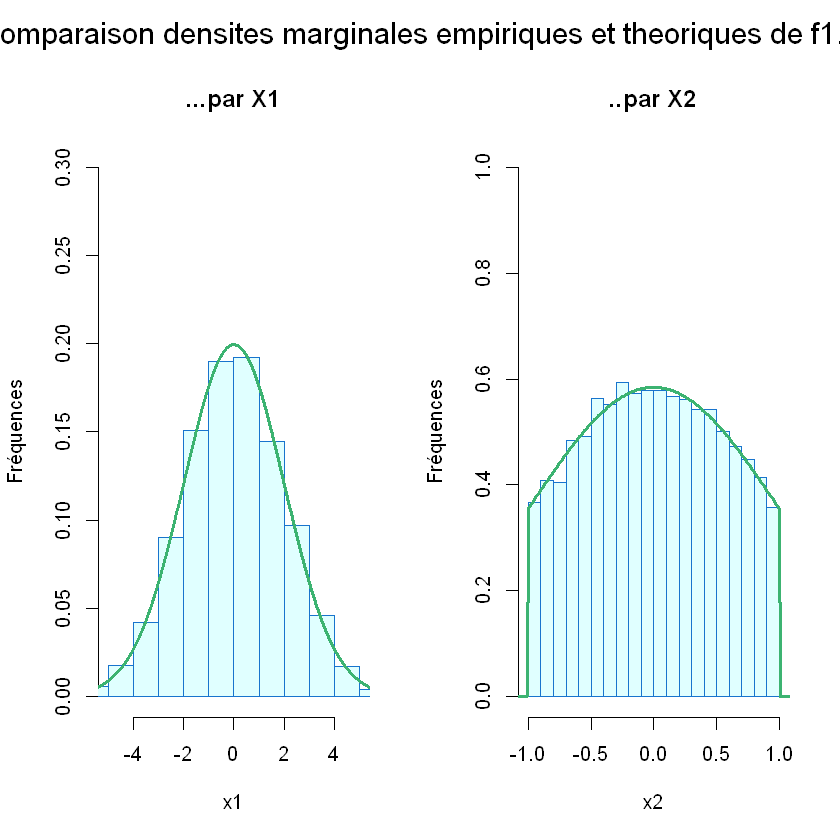

In [6]:
N<-10000 #Nombre de simulation que l'on voudra 

rejet_g <- function(n,M,f) { #Algorithme de rejet fixe au g definit dans les donnees 
  #n le nombre de simulation ayant pour densite f que l'on veut
  #M la constante telle que f<Mg
  A <- matrix(0, nrow =n, ncol = 2)
  # matrice dont chaque ligne contient une realisation d'echantillion suivant f
  for (i in 1:n) {
    u <- runif(1)
    A[i,1] <- rnorm(1,0,2)
    A[i,2] <- rnorm(1,0,1)
    while (u>f(A[i,1],A[i,2])/(M*g(A[i,1],A[i,2]))) { 
      u <- runif(1)
      A[i,1] <- rnorm(1,0,2)
      A[i,2] <- rnorm(1,0,1)
    }
  }
  return(A)     
}

X<- rejet_g(N,M1,ft1) #Notre vecteur avec N simulations suivant f

ptm <- proc.time() ; x <- rejet_g(N,M1,ft1) ; proc.time() - ptm


par(mfrow=c(1,2),oma = c(0, 0, 2, 0))
t <- seq(-10, 10, 0.01)

hist(X[,1], freq = FALSE, main = "...par X1",xlab = "x1",ylab = "Fréquences",
     ylim=c(0,0.3),xlim=c(-5,5),col="lightcyan",border="dodgerblue3")
lines(t, dnorm(t,0,2), col = "mediumseagreen", lwd = 3)

hist(X[,2], freq = FALSE, main = "..par X2",xlab = "x2",ylab = "Fréquences",
     ylim=c(0,1),col="lightcyan",border="dodgerblue3")
lines(t, dmarginale2f1(t), col = "mediumseagreen", lwd = 3)
mtext("Comparaison densites marginales empiriques et theoriques de f1...",outer = TRUE,  cex = 1.5)


   user  system elapsed 
   0.02    0.01    0.03 

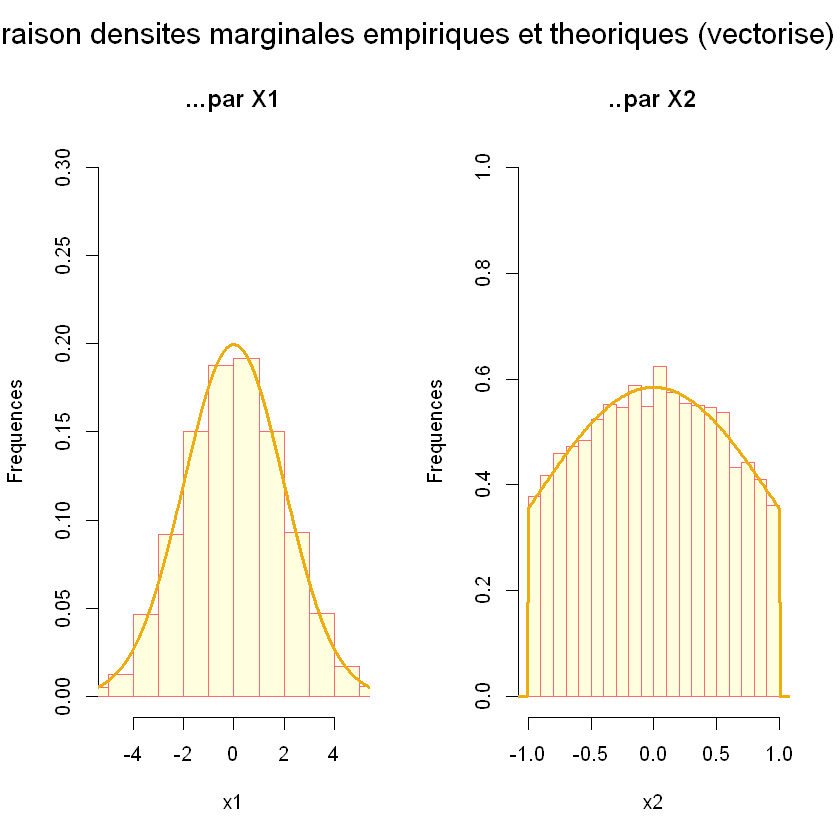

In [7]:
N<-10000
rejet_vect_gu_f <- function(n) {
  #Algorithme de rejet vectorise pour f et g donc la deuxieme v.a. est une unifrome
  V1 <- c() # Echantillons de sortie
  V2 <- c()
  m <- n # Nombre de realisations restantes a obtenir
  
  while (m > 0) {
    k<-m%/%(c1*Mu1)+1
    y1 <- rnorm(k, 0, 2)
    y2 <- runif(k,-1,1)
    u <- runif(k)
    
    condi<-(u <=ft1(y1,y2)/(Mu1*gu(y1,y2)))
    x1 <- (condi)*y1
    x2 <- (condi)*y2
    
    V1 <- c(V1, x1[which(x1 != 0)])
    V2 <- c(V2, x2[which(x2 != 0)])
    m <- n - length(V1)
  }
  return(list(V1[1:n],V2[1:n]))
}

X<- rejet_vect_gu_f(N) 
#Notre vecteur avec N simulations suivant f

ptm <- proc.time() ; x <- rejet_vect_gu_f(N) ; proc.time() - ptm

par(mfrow=c(1,2),oma = c(0, 0, 2, 0))
t <- seq(-10, 10, 0.01)

hist(X[[1]], freq = FALSE, main = "...par X1",xlab = "x1",ylab = "Frequences",
     ylim=c(0,0.3),xlim=c(-5,5),col="lightyellow",border="indianred1")
lines(t, dnorm(t,0,2), col = "darkgoldenrod2", lwd = 3)

hist(X[[2]], freq = FALSE, main = "..par X2",xlab = "x2",ylab = "Frequences",
     ylim=c(0,1),col="lightyellow",border="indianred1")
lines(t, dmarginale2f1(t), col = "darkgoldenrod2", lwd = 3)
mtext("Comparaison densites marginales empiriques et theoriques (vectorise) de f1...",outer = TRUE,  cex = 1.5)



,value,var,born_inf_IC,born_sup_IC
10000,0.2546,0.1897978,0.2460613,0.2631387


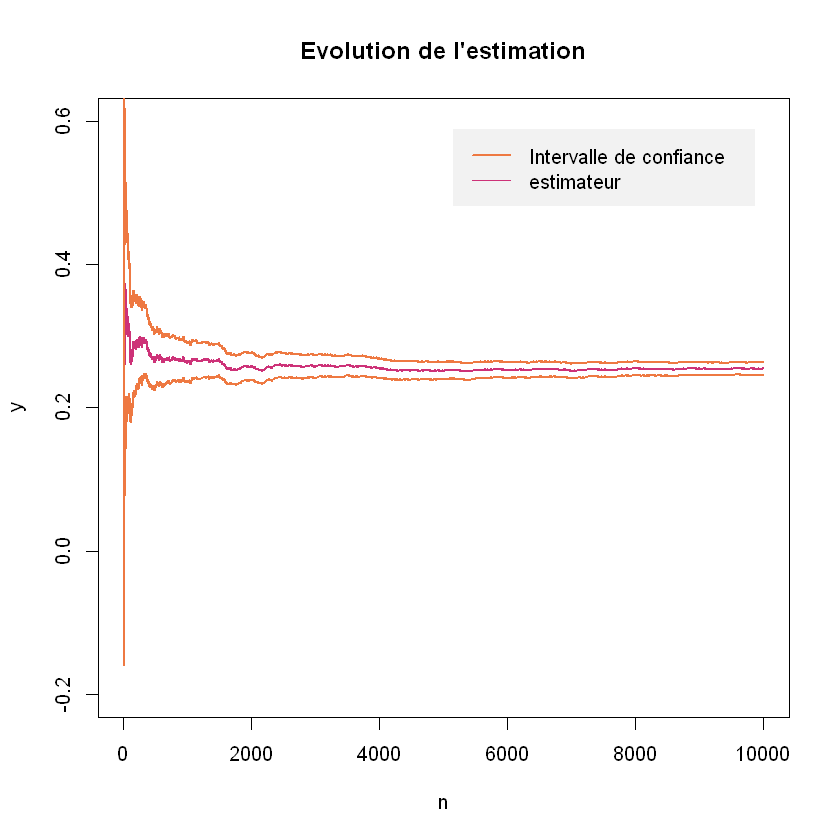

In [8]:
n<-10000
lev<-0.95 ##niveau de l'intervalle de confiance
x<-rejet_g(n,M1,ft1) ## on applique l'algorithme de rejet pour recuperer des echantillons suivant la loi de f1


## fonction qui retourne les caracteristiques de l'estimateur + graphe
MC <- function(y,lev) {   ##Methode de monte carlo classique
  a<-evolE(y)        ## on recupere l'evolution de l'estimateur
  b<-evolIC(y,a,lev) ## on recupere l'evolution de l'intervalle de confiance
  n<-length(y)
  par(mfrow=c(1,1))
  plot(1:n, a, type = "l", lwd = 2, col = "violetred3",main = "Evolution de l'estimation", ylim = c(-0.2,0.6), xlab = "n",ylab="y")
  lines(2:n, b$born_inf_IC[-1], col = "sienna2", lwd = 2)
  lines(2:n, b$born_sup_IC[-1], col = "sienna2", lwd = 2)
  legend("topright", c("Intervalle de confiance", "estimateur"), lwd = c(2, 1),
         col = c("sienna2", "violetred3"), inset = 0.05, bg = "gray95",
         box.lty = 0)
  return(data.frame(value=a[n],b[n,]))
}


## la fonction "transfo" permet de d'avoir des simulations de h(X1,X2) ou (X1,X2) a pour densite f1
transfo<- function(x,h){   ## on applique la fonction h sur 2 vecteurs
  return(h(x[,1],x[,2]))  ## on applique la fonction h a des vecteurs 
}

h1<- function(x,y) {    ## fonction dont on va chercher a estimer l'esperence
  return(((exp(x)+exp(y))>=5)*1)
}

y0<-transfo(x,h1)
MC(y0,lev)


In [9]:
m<-3051
1-(0.95)^(1/m)

[1] 1.681182e-05